# Урок 10. Метод К-средних
## Внутрикластерное расстояние

### Способ 1

In [ ]:
import numpy as np
from scipy.spatial import distance

x1 = np.array([1, 2])
x2 = np.array([0, 3])
x3 = np.array([-1, 1])

in_cluster_dist = round(2 * sum([distance.euclidean(x1, x2), distance.euclidean(x1, x3), distance.euclidean(x2, x3)]), 3)
in_cluster_dist

11.773

In [ ]:
mean_in_cluster_dist = round(in_cluster_dist / 3, 3)
mean_in_cluster_dist

3.924

### попытка попарно перемножить (оказалось можно через sklearn)

In [ ]:
def pairwise_multiply_masking(a):
    return (a[:,None]*a)[~np.tri(len(a),k=-1,dtype=bool)]

#### Как работает функция pairwise_multiply_masking()?

In [ ]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [ ]:
a[:, None]

array([[1],
       [2],
       [3]])

In [ ]:
a[:,None]*a

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [ ]:
~np.tri(len(a), k=-1, dtype=bool) # k = 0 - главная диагональ

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

### Способ 2

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

W = euclidean_distances([x1, x2, x3]).sum()
round(W, 3)

11.773

In [ ]:
round(W / 3, 3)

3.924

## К какому кластеру относится точка (4, 0), если координаты центроидов (0, 2) и (2, -3)?

In [ ]:
import numpy as np
from scipy.spatial import distance

research_object = np.array([4, 0])
c1 = np.array([0, 2])
c2 = np.array([2, -3])

centroid_coords_zipped = [c1, c2]
x, y = zip(*centroid_coords_zipped)

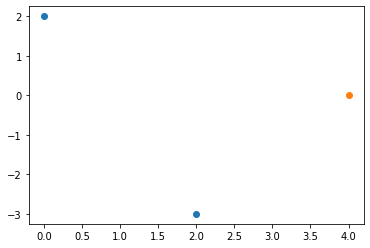

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(x, y)
plt.scatter(research_object[0], research_object[1])

In [ ]:
distances = [distance.euclidean(x, c) ** 2 for c in [c1, c2]]
distances

[0.0, 28.999999999999996]

In [ ]:
min_dist = min(distances)
min_dist

0.0

# Урок 10. Агломеративная кластеризация

## Методы вычисления расстояния между кластерами

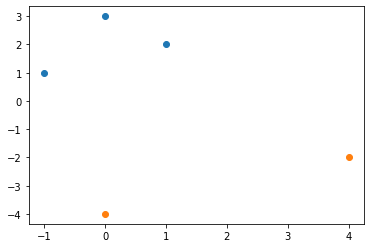

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array([1, 2])
x2 = np.array([0, 3])
x3 = np.array([-1, 1])

cluster1 = [x1, x2, x3]
cluster1_x, cluster1_y = zip(*cluster1)

x4 = np.array([0, -4])
x5 = np.array([4, -2])

cluster2 = [x4, x5]
cluster2_x, cluster2_y = zip(*cluster2)


plt.scatter(cluster1_x, cluster1_y)
plt.scatter(cluster2_x, cluster2_y)

## Метод полной связи (метод дальнего соседа) и Метод одиночной связи (метод ближайшего соседа)

In [ ]:
dist = []

for element in cluster1:
  dist.extend([distance.euclidean(element, obj) for obj in cluster2])
np.round(dist, 3)

array([6.083, 5.   , 7.   , 6.403, 5.099, 5.831])

## Метод средней связи (среднее невзвешенное расстояние)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

W = euclidean_distances(cluster1, cluster2).sum() / (len(cluster1) * len(cluster2))
round(W, 3)

5.903

## Центроидный метод (центроидальный метод)

In [ ]:
import numpy as np
from scipy.spatial import distance


centroid_1 = np.array([sum(cluster1_x) / len(cluster1), sum(cluster1_y) / len(cluster1)])
centroid_2 = np.array([sum(cluster2_x) / len(cluster2), sum(cluster2_y) / len(cluster2)])
round(distance.euclidean(centroid_1, centroid_2), 3)

5.385

## Произведите иерархическую кластеризацию. Для определения расстояния между кластерами используйте метод одиночной связи.

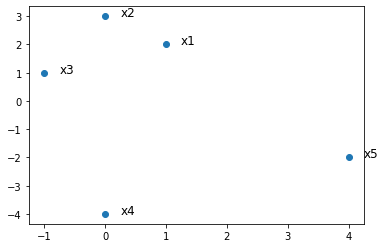

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array([1, 2])
x2 = np.array([0, 3])
x3 = np.array([-1, 1])
x4 = np.array([0, -4])
x5 = np.array([4, -2])

cluster1 = [x1, x2, x3, x4, x5]

labs = [f'x{i}' for i in range(1, len(cluster1)+1)]

cluster1_x, cluster1_y = zip(*cluster1)

plt.scatter(cluster1_x, cluster1_y)

#use for loop to add annotations to each point in plot 
for i, txt in enumerate(labs):
  plt.annotate(txt, (cluster1_x[ i ]+.25, cluster1_y[ i ]), fontsize=12)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

matrix = euclidean_distances(cluster1)
np.round(matrix, 3)

array([[0.   , 1.414, 2.236, 6.083, 5.   ],
       [1.414, 0.   , 2.236, 7.   , 6.403],
       [2.236, 2.236, 0.   , 5.099, 5.831],
       [6.083, 7.   , 5.099, 0.   , 4.472],
       [5.   , 6.403, 5.831, 4.472, 0.   ]])